## Анализ поведения клиентов на сайте

## О проекте

Этот учебный проект был выполнен в рамках курса по аналитике данных.  
Задача — провести исследование пользовательского поведения и платформенных предпочтений, используя данные о клиентах и их действиях в приложении.

---

## Цели проекта

- Ознакомиться с реальными пользовательскими логами
- Построить базовый продуктовый анализ
- Ответить на бизнес-вопросы с помощью Python и визуализации
- Потренироваться в группировках, фильтрации и построении графиков

---

## Задачи

1. Импортировать библиотеки, загрузить датасеты `user_data` и `logs`, проверить:
   - размер таблиц
   - типы данных
   - пропущенные значения
   - описательную статистику

2. Узнать, **с какой платформы осуществляется больше всего успешных операций**

3. Посмотреть, **какую платформу предпочитают премиум-клиенты**

4. **Визуализировать распределение возраста клиентов**, в зависимости от типа (премиум / обычный)

5. Построить **распределение числа успешных операций**

7. Построить график `sns.countplot`:
   - по платформе `computer`
   - `x`: возраст, `y`: количество успешных операций  
   → определить, **клиенты какого возраста совершают больше успешных действий**

## Описание данных

### user_data.csv

Информация о клиентах:

| Поле      | Описание                                      |
|-----------|-----------------------------------------------|
| `client`  | Идентификатор пользователя                    |
| `premium` | Является ли пользователь премиум-клиентом (`True` / `False`) |
| `age`     | Возраст пользователя                          |

---

### logs.csv

События и действия пользователей в приложении:

| Поле      | Описание                                      |
|-----------|-----------------------------------------------|
| `client`  | Идентификатор пользователя                    |
| `success` | Результат действия: `1` — успех, `0` — неуспех |
| `platform`| Платформа, с которой зашёл пользователь (например, `mobile`, `web`) |
| `time`    | Время события в формате Unix-времени          |

In [1]:
#импорт необходимых библиотек
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Загружаем csv-файлы с данными о пользователях и их действиях на сайте

In [2]:
#импорт csv c разделитлем ,
#загружаем файл в df

user_data = pd.read_csv('/Users/ajsyluakataeva/Karpov/lesson_3/user_data.csv', sep=',')
logs = pd.read_csv('/Users/ajsyluakataeva/Karpov/lesson_3/logs.csv', sep=',')

In [16]:
user_data.shape
user_data.dtypes
user_data.describe()
user_data.head()

,client,premium,age
0,1001,True,25
1,1002,False,30
2,1003,True,45
3,1004,False,22
4,1005,True,35


In [17]:
logs.shape
logs.dtypes
logs.describe()
logs.head()

,client,success,platform,time
0,1001,1,web,1690000000
1,1001,1,mobile,1690001000
2,1003,1,desktop,1690002000
3,1004,1,web,1690003000
4,1005,0,mobile,1690004000


### 1. Определим с какой платформы осуществляется наибольшее количество успешных операций

In [18]:
top_platform = (logs.query('success == 1')
                .groupby(['platform'], as_index=False)
                .agg(success_count=('success', 'sum')))
top_platform

,platform,success_count
0,desktop,15
1,mobile,9
2,web,9


In [19]:
#Какая платформа наиболее популярна среди премиумных клиентов?

In [20]:
premium_client = user_data[['client', 'premium']]

In [21]:
premium_client = premium_client.query('premium == True')

In [22]:
premium_platform = logs[['client', 'platform']]

In [23]:
premium_df = premium_client.merge(premium_platform, on='client', how='inner')

In [24]:
premium_df = (premium_df.groupby(['platform'],as_index=False)
              .agg({'client': 'count'})
              .rename(columns={'client': 'count'})
              .sort_values(['platform'], ascending = False))
premium_df

,platform,count
2,web,9
1,mobile,9
0,desktop,8


### 1. Выводы:
- наиболее популярная платформа среди пользователей **desktop**
- но премиальные клиенты предпочитают  **mobile** и **web**	

### 2. Изучаю распределение возраста клиентов в зависимости от типа клиента (обычный или премиум)

In [25]:
main_df = user_data.merge(logs, on='client', how='inner')

In [26]:
premium_age = main_df.query('premium == True')

In [27]:
not_premium_age = main_df.query('premium == False')

/var/folders/67/ddmy4vp54993p77g6knmjv780000gn/T/ipykernel_16742/4234022117.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(premium_age.age, label="Premium")
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/67/ddmy4vp54993p77g6knmjv780000gn/T/ipykernel_16742/4234022117.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot

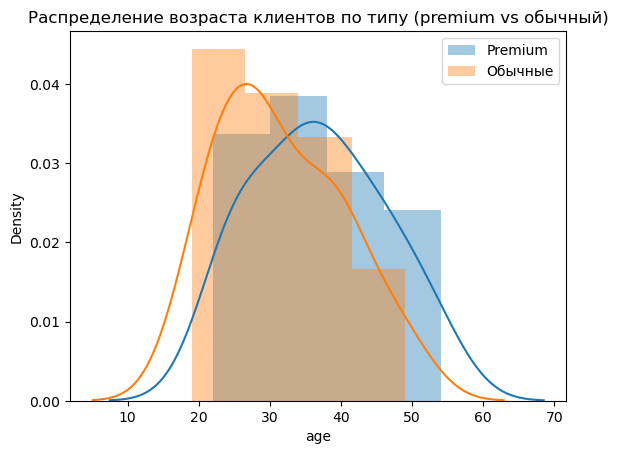

In [28]:
plt.title("Распределение возраста клиентов по типу (premium vs обычный)")
sns.distplot(premium_age.age, label="Premium")
sns.distplot(not_premium_age.age, label="Обычные")
plt.legend()

In [30]:
success_df = main_df.query('success == 1')

<Axes: xlabel='premium', ylabel='count'>

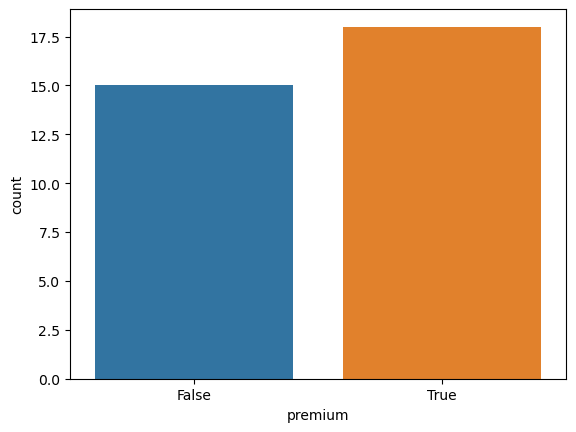

In [31]:
sns.countplot(success_df, x="premium", )

### 2. Выводы
- среди премиальных клиентов преобладает возрат **30-40 лет**
- среди непремиальных клиентов преобладает возраст **20-30 лет**
- число успешных операций выше в сегменте премиальных клиентов

### 3. Изучаю число успешных операций, сделанных на платформе desktop (самая популярная платформа среди пользователей п.1), в зависимости от возраста

In [32]:
success_df = (main_df.query('success == 1'))

<Axes: xlabel='age', ylabel='count'>

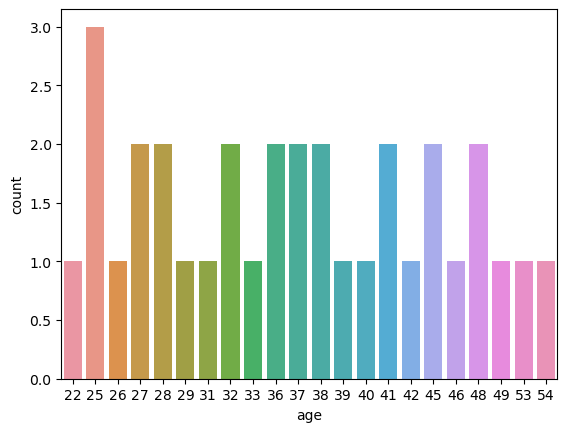

In [33]:
sns.countplot(success_df, x="age", )

In [34]:
success_df = (main_df.query('success == 1')
              .query("platform == 'desktop'"))

<Axes: xlabel='age', ylabel='count'>

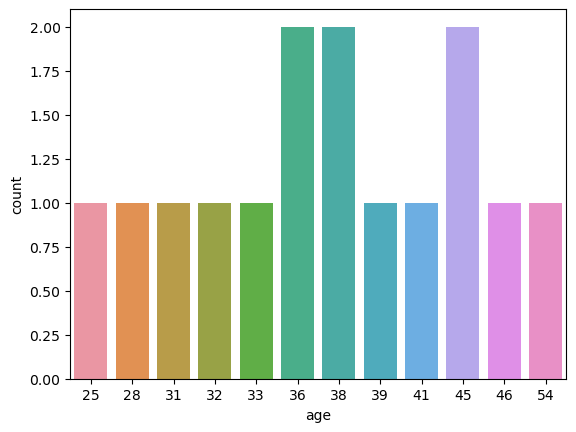

In [35]:
sns.countplot(success_df, x="age", )

### 3. Выводы 
- наибольшее количество успешных операций (в сумме со всех платформ) было сделано пользователями в возрасте **25 лет**
- наибольшее количество успешных операций на платформе **desktop** было проведено пользователями в возрасте **36, 38, 45 лет**

## Основные выводы
1. Платформа **desktop** оказалась самой популярной для успешных операций, а среди премиумных клиентов платформы **web**, **mobile**.
2. Возрастное распределение клиентов показывает, что активность выше в возрасте **25 лет**
3. Но при этом общая активность выше в сегменте премиальных клиентов, где преобладают клиенты в возрасте 30-40 лет